**420-A52-SF - Algorithmes d'apprentissage supervisé - Automne 2022 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2022 Mikaël Swawola
<br/>
![Travaux Pratiques - Moneyball NBA](static/05-A1-banner.png)
<br/>
**Objectif:** cette séance de travaux pratique est consacrée à la mise en oeuvre de l'ensemble des connaissances acquises jusqu'alors sur un nouveau jeu de données, *NBA*

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### 0 - Chargement des bibliothèques

In [2]:
# Manipulation de données
import numpy as np
import pandas as pd

# Visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configuration de la visualisation
sns.set(style="darkgrid", rc={'figure.figsize':(11.7,8.27)})

### 1 - Lecture du jeu de données *NBA*

**Lire le fichier `NBA_train.csv`**

In [5]:
# Compléter le code ci-dessous ~ 1 ligne
NBA = pd.read_csv("../../data/NBA_train.csv")

**Afficher les dix premières lignes de la trame de données**

In [6]:
# Compléter le code ci-dessous ~ 1 ligne
NBA.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


Ci-dessous, la description des différentes variables explicatives du jeu de données
</br>

| Variable      | Description                                                   |
| ------------- |:-------------------------------------------------------------:|
| SeasonEnd     | Année de fin de la saison                                     |
| Team          | Nom de l'équipe                                               |
| Playoffs      | Indique si l'équipe est allée en playoffs                     |
| W             | Nombre de victoires au cours de la saison régulière           |
| PTS           | Nombre de points obtenus (saison régulière)                   |
| oppPTS        | Nombre de points obtenus pas les opposants (saison régulière) |
| FG            | Nombre de Field Goals réussis                                 |
| FGA           | Nombre de tentatives de Field Goals                           |
| 2P            | Nombre de 2-pointers réussis                                  |
| 2PA           | Nombre de tentatives de 2-pointers                            |
| 3P            | Nombre de 3-pointers réussis                                  |
| 3PA           | Nombre de tentatives de 3-pointers                            |
| FT            | Nombre de Free throws réussis                                 |
| FTA           | Nombre de tentatives de Free throws                           |
| ORB           | Nombre de rebonds offensifs                                   |
| DRB           | Nombre de rebonds défensifs                                   |
| AST           | Nombre de passes décisives (assists)                          |
| STL           | Nombre d'interceptions (steals)                               |
| BLK           | Nombre de contres (blocks)                                    |
| TOV           | Nombre de turnovers                                           |


### 1 - Régression linéaire simple

Nous allons dans un premier temps effectuer la prédiction du nombre de victoires au cours de la saison régulière en fonction de la différence de points obtenus pas l'équipe et par ses opposants
<br/><br/>
Nous commencons donc par un peu d'**ingénierie de données**. Une nouvelle variable explicative correspondant à la différence de points obtenus pas l'équipe et par ses opposants est crée

**Créer un nouvelle variable PTSdiff, représentant la différence entre PTS et oppPTS**

In [7]:
# Compléter le code ci-dessous ~ 1 ligne
NBA['PTSdiff'] = NBA['PTS'] - NBA['oppPTS']

In [8]:
NBA.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,...,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PTSdiff
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,...,75,2038,2645,1369,2406,1913,782,539,1495,239
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,...,422,1907,2449,1227,2457,2198,809,308,1539,639
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,...,275,2019,2592,1115,2465,2152,704,392,1684,-222
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,...,187,1702,2205,1307,2381,2108,764,342,1370,28
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,...,255,1871,2539,1311,2524,2079,746,404,1533,-362


**Stocker le nombre de lignes du jeu de donnée (nombre d'exemples d'entraînement) dans la variable `m`**

In [9]:
# Compléter le code ci-dessous ~ 1 ligne
m = len(NBA)

**Stocker le nombre de victoires au cours de la saison dans la variable `y`. Il s'agira de la variable que l'on cherche à prédire**

In [10]:
m

835

In [11]:
# Compléter le code ci-dessous ~ 1 ligne
y = NBA['W'].values

**Créer la matrice des prédicteurs `X`.** Indice: `X` doit avoir 2 colonnes...

In [37]:
# Compléter le code ci-dessous ~ 3 lignes
NBA['x0']= np.ones(m)
X = NBA[['x0', 'PTSdiff']].values

x0 = np.ones((m))
x1 = NBA['PTSdiff']
#X = np.array((x0,x1))

AttributeError: 'numpy.ndarray' object has no attribute 'head'

**Vérifier la dimension de la matrice des prédicteurs `X`. Quelle est la dimension de `X` ?**

In [38]:
# Compléter le code ci-dessous ~ 1 ligne
X.shape

(835, 2)

**Créer le modèle de référence (baseline)**

In [39]:
# Compléter le code ci-dessous ~ 1 ligne
## le plus simple possible
y_baseline = y.mean()

**À l'aide de l'équation normale, trouver les paramètres optimaux du modèle de régression linéaire simple**

In [40]:
# Compléter le code ci-dessous ~ 1 ligne
theta = np.dot(np.dot(np.linalg.pinv(np.dot(X, X.T)), X).T, y)
theta

array([4.09962834e+01, 3.22473990e-02])

**Calculer la somme des carrées des erreurs (SSE)**

In [41]:
### Sum of squared errors
# Compléter le code ci-dessous ~ 1 ligne
error = np.dot(theta.T, X.T) - y  # (theta_0 + theta_1*x) - y
SSE = np.dot(error, error.T) # la somme de carrés
SSE

7819.603212563687

In [42]:
error

array([-1.29658820e+00,  6.02371392e-01,  3.83736087e+00,  4.89921062e+00,
       -6.77274987e-01,  3.19704173e+00,  5.38721981e+00,  4.47747030e-01,
        2.15818170e+00,  2.28386498e+00, -3.39597545e+00,  2.41219331e+00,
        3.90053314e+00, -1.03497206e+00, -6.84611651e+00, -4.49073386e+00,
        8.35707713e-01, -1.00338592e+00, -4.96783221e+00, -2.68521015e+00,
        1.09831575e+00, -4.74342294e+00,  1.80544410e+00, -5.46047025e+00,
        1.22036208e+00,  1.61818650e-01,  3.77782555e+00,  2.73863488e+00,
        3.29213077e+00, -1.13171426e+00,  1.86696322e+00,  7.04734327e-01,
        1.02853084e+00, -2.84578588e+00,  2.15733236e-01,  1.06606835e+00,
       -4.71481249e+00, -2.36391613e-01, -1.42789222e+00, -1.64965643e+00,
       -3.39333040e+00,  8.04121577e-01,  2.64288458e+00, -2.57921026e+00,
        2.02853084e+00,  4.15168999e-01, -5.13832689e+00,  1.64321521e+00,
        3.48759896e+00,  1.29047761e+00, -3.61707840e+00, -4.22271479e-01,
       -1.26268764e+00, -

In [43]:
theta

array([4.09962834e+01, 3.22473990e-02])

**Calculer la racine carrée de l'erreur quadratique moyenne (RMSE)**

In [44]:
### RMSE = Root Mean Square Error
# Compléter le code ci-dessous ~ 1 ligne
RMSE = np.sqrt(SSE/m)
RMSE

3.0601951353701837

**Calculer le coefficient de détermination $R^2$**

In [45]:
y_baseline

41.0

In [46]:
### Une valeur près de 1 = bonne
# Compléter le code ci-dessous ~ 1-2 lignes
# R2 -1 - (SSE/Baseline SSE)
# y_baseline -> erreur par rapport au baseline
R2 = 1-SSE/np.sum((y-y_baseline)**2)
R2 

0.9422404513704652

**Affichage des résultats**

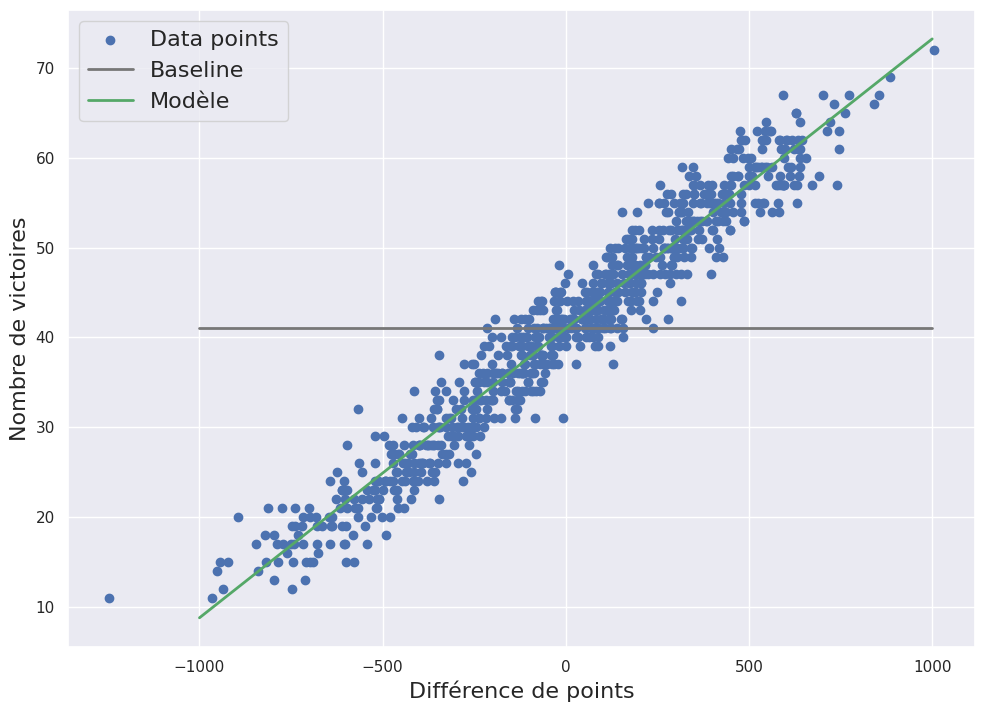

In [47]:
fig, ax = plt.subplots()
ax.scatter(x1, y,label="Data points")
reg_x = np.linspace(-1000,1000,50)
reg_y = theta[0] + np.linspace(-1000,1000,50)* theta[1]
ax.plot(reg_x, np.repeat(y_baseline,50), color='#777777', label="Baseline", lw=2)
ax.plot(reg_x, reg_y, color="g", lw=2, label="Modèle")
ax.set_xlabel("Différence de points", fontsize=16)
ax.set_ylabel("Nombre de victoires", fontsize=16)
ax.legend(loc='upper left', fontsize=16)

### 3 - Régression linéaire multiple

Nous allons maintenant tenter de prédire le nombre de points obtenus par une équipe donnée au cours de la saison régulière en fonction des autres variables explicatives disponibles. Nous allons mettre en oeuvre plusieurs modèles de régression linéaire multiple

**Stocker le nombre de points marqués au cours de la saison dans la variable `y`. Il s'agira de la varible que l'on cherche à prédire**

In [63]:
# Compléter le code ci-dessous ~ 1 ligne
y = NBA['PTS'].values
y

array([ 8573,  9303,  8813,  9360,  8878,  8933,  8493,  9084,  9119,
        8860,  9438,  9025,  8879,  9344,  8949,  9114,  8402,  9788,
        8820,  8897,  8394,  8773,  8604,  9008,  8937,  8670,  8322,
        9986,  8174,  9006,  8878,  8827,  8769,  9117,  9276,  8768,
        8849,  9156,  9019,  9080,  9209,  8737,  8531,  8301,  8662,
        8281,  9180,  8743,  8463,  8575, 10371,  9112,  9092,  8680,
        8379,  8785,  9400,  8890,  8746,  8707,  9119,  8705,  9006,
        9272,  8896,  8795,  9094,  8485,  8335,  9191,  9102,  7964,
        9243, 10105,  9239,  8908,  8145,  8911,  9328,  9433,  8740,
        8672,  8198,  9191,  8776,  8808,  9375,  8903,  9019,  8938,
        8134,  8321,  9194,  8501,  8386,  9052, 10147,  9602,  9008,
        9071,  8566,  9023,  9478,  8666,  9019,  8763,  8838,  9101,
        9277,  9862,  9077,  8865,  9428,  8423,  8743,  9412,  8916,
        8903,  9116,  9841,  9508,  9052,  9118,  8879,  9413,  8784,
        9696,  9090,

**Créer la matrice des prédicteurs `X` à partir des variables `2PA` et `3PA`**

In [66]:
# Compléter le code ci-dessous ~ 3 lignes
NBA['x0']= np.ones(m)
X = NBA[['x0', '2PA', '3PA']].values.T
X
#X3p = NBA[['x0', '3PA']].values

#x0 = np.ones((m))
#x1 = NBA['PTSdiff']
#X = np.array((x0,x1))

array([[1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [6.952e+03, 6.965e+03, 6.668e+03, ..., 5.664e+03, 5.334e+03,
        5.706e+03],
       [7.500e+01, 4.220e+02, 2.750e+02, ..., 1.091e+03, 1.256e+03,
        1.182e+03]])

In [67]:
# Compléter le code ci-dessous ~ 1 ligne
X.shape

(3, 835)

**Vérifier la dimension de la matrice des prédicteurs `X`. Quelle est la dimension de `X` ?**

**Créer le modèle de référence (baseline)**

In [68]:
# Compléter le code ci-dessous ~ 1 ligne
y_baseline = y.mean()
y_baseline

8370.239520958085

**À l'aide de l'équation normale, trouver les paramètres optimaux du modèle de régression linéaire**

In [69]:
# Compléter le code ci-dessous ~ 1 ligne
A = np.dot(X, X.T)
A_inv = np.linalg.inv(A)
theta = np.dot(np.dot(A_inv, X), y)
theta 

array([845.79026343,   1.10276102,   1.04257987])

**Calculer la somme des carrées des erreurs (SSE)**

In [75]:
# Compléter le code ci-dessous ~ 1 ligne
error = np.dot(theta, X)-y
SSE = np.dot(error, error.T)

**Calculer la racine carrée de l'erreur quadratique moyenne (RMSE)**

In [76]:
# Compléter le code ci-dessous ~ 1 ligne
MSE = SSE/m
RMSE = np.sqrt(MSE)

**Calculer le coefficient de détermination $R^2$**

In [77]:
# Compléter le code ci-dessous ~ 1-2 lignes
bas_err = y_baseline -y
R2 = 1 - SSE/np.dot(bas_err.T, bas_err)
R2

0.6322685733797784

### 3 - Ajouter les variables explicatives FTA et AST

**Recommencer les étapes ci-dessus en incluant les variables FTA et AST**

In [ ]:
None

### 4 - Ajouter les variables explicatives ORB et STL

**Recommencer les étapes ci-dessus en incluant les variables ORB et STL**

In [ ]:
None

### 5 - Ajouter les variables explicatives DRB et BLK

**Recommencer les étapes ci-dessus en incluant les variables DRB et BLK**

In [ ]:
None

### 6 - Optionnel - Regression polynomiale

Ajouter des variables explicatives de type polynomiales

### Fin du TP